In [1]:
#Installation des libraries(bibliothèques)
#Installer les dépendences (dependencies) nécessaires pour utiliser la bibliothèque (library) geoio
#Pour la library/bibliothèque geoio il faut installer la library/bibliothèque GDAL
#GDAL (Geospatial Data Abstraction Library) est une bibliothèque clé pour la gestion des données géospatiales,
#et c'est une dépendance courante pour de nombreux packages Python géospatiaux, y compris geoio.
#Utiliser dans l'anaconda prompt la commande suivante: conda install -c conda-forge gdal
# Cette commande dit à Conda d'installer le package GDAL à partir du la chaine conda-forge
#l'installation d'un package nécessite la compilation de code,
#ce qui signifie que vous avez besoin d'outils de développement installés sur votre système
#sur un système Linux vous installerez build-essential.
#Sous Windows, vous devrez peut-être installer Visual C++ Build Tools.
# Ensuite utiliser pip install gdal dans ton anaconda prompt
# Enfin dans la commande de l'anaconda prompt écrire: pip install geoio
# Si vous rencontrez une erreure de type ImportError: cannot import name 'Sequence' from 'collections'
#Vous devez Modifier le code source
# Vous devez ouvrier à l'aide éditeur comme notepad++ le fichier à cette localisation
# ~\anaconda3\Lib\site-packages\geoio\base.py
#Vous remplacez cette ligne de code "collections import Sequence"
#Par celle-ci from collections.abc import Sequence

In [2]:
# On charge les bibliothèques nécessaires
import pandas as pd
import numpy as np
import os
import geoio

In [3]:
#Chargement des données d'enquetes
df_base = pd.read_stata("C:/Users/d/Desktop/Programme du projet sur CNN pauvreté/Data/EHCVM_2018/dataout/ehcvm_welfare_CIV2018.dta")

df_gps = pd.read_stata("C:/Users/d/Desktop/Programme du projet sur CNN pauvreté/Data/EHCVM_2018/datain/Menage/s00_me_civ2018.dta")


In [4]:
print(df_base.shape,df_gps.shape)
print(df_base.head,df_gps.head)

(12992, 39) (12992, 52)
<bound method NDFrame.head of       country  year      hhid  grappe  menage  vague      zae  \
0         CIV  2018     101.0       1       1      1  ABIDJAN   
1         CIV  2018     102.0       1       2      1  ABIDJAN   
2         CIV  2018     103.0       1       3      1  ABIDJAN   
3         CIV  2018     104.0       1       4      1  ABIDJAN   
4         CIV  2018     105.0       1       5      1  ABIDJAN   
...       ...   ...       ...     ...     ...    ...      ...   
12987     CIV  2019  108408.0    1084       8      2   CENTRE   
12988     CIV  2019  108409.0    1084       9      2   CENTRE   
12989     CIV  2019  108410.0    1084      10      2   CENTRE   
12990     CIV  2019  108411.0    1084      11      2   CENTRE   
12991     CIV  2019  108412.0    1084      12      2   CENTRE   

                   region  milieu         milieu2  ...          dali  \
0      AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...  2.580680e+06   
1      AUTONOME D'ABI

In [5]:
df_base.info()
df_gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    12992 non-null  object  
 1   year       12992 non-null  int16   
 2   hhid       12992 non-null  float32 
 3   grappe     12992 non-null  int16   
 4   menage     12992 non-null  int8    
 5   vague      12992 non-null  int8    
 6   zae        12992 non-null  category
 7   region     12992 non-null  category
 8   milieu     12992 non-null  category
 9   milieu2    12992 non-null  category
 10  hhweight   12992 non-null  float32 
 11  hhsize     12992 non-null  int8    
 12  eqadu1     12992 non-null  float64 
 13  eqadu2     12992 non-null  float32 
 14  hgender    12992 non-null  category
 15  hage       12992 non-null  int16   
 16  hmstat     12992 non-null  category
 17  hreligion  12992 non-null  category
 18  hnation    12992 non-null  category
 19  hethnie    10725 non-null

In [6]:
# Imprimer les noms de toutes les colonnes de la dataframe df_base
print("Les noms des colonnes dans la data frame sont:")
for column in df_base:
    print(column)

Les noms des colonnes dans la data frame sont:
country
year
hhid
grappe
menage
vague
zae
region
milieu
milieu2
hhweight
hhsize
eqadu1
eqadu2
hgender
hage
hmstat
hreligion
hnation
hethnie
halfab
heduc
hdiploma
hhandig
hactiv7j
hactiv12m
hbranch
hsectins
hcsp
dali
dnal
dtot
dtet
pcexp
zref
def_spa
def_temp
decile
quintile


In [7]:
# Imprimer les noms de toutes les colonnes de la dataframe df_gps
print("Les noms des colonnes dans la data frame sont:")
for column in df_gps:
    print(column)    

Les noms des colonnes dans la data frame sont:
interview__key
interview__id
grappe
menage
vague
GPS__Latitude
GPS__Longitude
GPS__Accuracy
GPS__Altitude
GPS__Timestamp
nom_prenom_cm
localisation_menage
s00q00
s00q01
s00q02
s00q03
s00q04
s00q05
s00q05_autre
s00q06
s00q07
s00q08
s00q09
s00q10
s00q11
s00q12
s00q13a
s00q13
s00q14
s00q15a
s00q15
s00q16
s00q17a
s00q17
s00q18
s00q19
s00q20
s00q21
s00q22
visite1
s00q23a
visite2
s00q24a
visite3
s00q25a
s00q23b
s00q24b
s00q25b
s00q28
s00q27
format_interview
observation


In [8]:
#J'ajoute les coordonnées GPS et je fusionne par les colonnes 
merged_df=pd.merge(df_base,df_gps,on=["grappe","menage","vague"], how='inner')


In [9]:
# Les informations sur les données fusionées
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 88 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   country              12992 non-null  object  
 1   year                 12992 non-null  int16   
 2   hhid                 12992 non-null  float32 
 3   grappe               12992 non-null  int16   
 4   menage               12992 non-null  int8    
 5   vague                12992 non-null  int8    
 6   zae                  12992 non-null  category
 7   region               12992 non-null  category
 8   milieu               12992 non-null  category
 9   milieu2              12992 non-null  category
 10  hhweight             12992 non-null  float32 
 11  hhsize               12992 non-null  int8    
 12  eqadu1               12992 non-null  float64 
 13  eqadu2               12992 non-null  float32 
 14  hgender              12992 non-null  category
 15  hage               

In [10]:
print(merged_df.isna())

       country   year   hhid  grappe  menage  vague    zae  region  milieu  \
0        False  False  False   False   False  False  False   False   False   
1        False  False  False   False   False  False  False   False   False   
2        False  False  False   False   False  False  False   False   False   
3        False  False  False   False   False  False  False   False   False   
4        False  False  False   False   False  False  False   False   False   
...        ...    ...    ...     ...     ...    ...    ...     ...     ...   
12987    False  False  False   False   False  False  False   False   False   
12988    False  False  False   False   False  False  False   False   False   
12989    False  False  False   False   False  False  False   False   False   
12990    False  False  False   False   False  False  False   False   False   
12991    False  False  False   False   False  False  False   False   False   

       milieu2  ...  s00q24a  visite3  s00q25a  s00q23b  s00q24

In [11]:
# les valeurs NaN (pas un nombre) dans la Dataframe
nan_valeurs = df_gps.isna()

# Compte le nombre de valuers NaN dans chaque colonne
nan_compte = nan_valeurs.sum()

# Imprime le décompte des valeurs NaN pour chaque colonne
print(nan_compte)

# Rapport détaillé avec les colonnes qui ont au moins une valeur NaN
colonnes_avc_nan = nan_compte[nan_compte > 0]
print("Colonnes avec au moins une valeur NaN:")
print(colonnes_avc_nan)


interview__key             0
interview__id              0
grappe                     0
menage                     0
vague                      0
GPS__Latitude             12
GPS__Longitude            12
GPS__Accuracy             12
GPS__Altitude             12
GPS__Timestamp             0
nom_prenom_cm              0
localisation_menage        0
s00q00                     0
s00q01                     0
s00q02                     0
s00q03                     0
s00q04                     0
s00q05                     0
s00q05_autre               0
s00q06                     0
s00q07                     0
s00q08                     0
s00q09                 12992
s00q10                     0
s00q11                     0
s00q12                     0
s00q13a                    3
s00q13                     0
s00q14                     0
s00q15a                    2
s00q15                     0
s00q16                     0
s00q17a                 9550
s00q17                     0
s00q18        

In [12]:
df_gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   interview__key       12992 non-null  object  
 1   interview__id        12992 non-null  object  
 2   grappe               12992 non-null  int16   
 3   menage               12992 non-null  int32   
 4   vague                12992 non-null  int8    
 5   GPS__Latitude        12980 non-null  float64 
 6   GPS__Longitude       12980 non-null  float64 
 7   GPS__Accuracy        12980 non-null  float64 
 8   GPS__Altitude        12980 non-null  float64 
 9   GPS__Timestamp       12992 non-null  object  
 10  nom_prenom_cm        12992 non-null  object  
 11  localisation_menage  12992 non-null  object  
 12  s00q00               12992 non-null  category
 13  s00q01               12992 non-null  category
 14  s00q02               12992 non-null  category
 15  s00q03             

In [13]:
#Une fonction qui permet d'enlever certaines colonnes

def enlever_colonnes(dataframe):
    
    return dataframe.iloc[:,:48]

#Créer une base de donnée qui est la version reduite de notre dataframe fusionnée
df_reduit=enlever_colonnes(merged_df)

In [14]:
df_reduit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   country              12992 non-null  object  
 1   year                 12992 non-null  int16   
 2   hhid                 12992 non-null  float32 
 3   grappe               12992 non-null  int16   
 4   menage               12992 non-null  int8    
 5   vague                12992 non-null  int8    
 6   zae                  12992 non-null  category
 7   region               12992 non-null  category
 8   milieu               12992 non-null  category
 9   milieu2              12992 non-null  category
 10  hhweight             12992 non-null  float32 
 11  hhsize               12992 non-null  int8    
 12  eqadu1               12992 non-null  float64 
 13  eqadu2               12992 non-null  float32 
 14  hgender              12992 non-null  category
 15  hage               

In [15]:
df_reduit.isna()

,country,year,hhid,grappe,menage,vague,zae,region,milieu,milieu2,...,quintile,interview__key,interview__id,GPS__Latitude,GPS__Longitude,GPS__Accuracy,GPS__Altitude,GPS__Timestamp,nom_prenom_cm,localisation_menage
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12988,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Option B: Enlever les valeurs manquantes
#df_reduit.dropna(inplace=True)
df_reduit_cleaned = df_reduit.dropna(subset=['GPS__Latitude', 'GPS__Longitude', 'GPS__Accuracy', 'GPS__Altitude'])
df_reduit_cleaned.to_csv('C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/Data/CIV/df_reduit_cleaned2.csv', index=False)

In [17]:
df_reduit_cleaned.shape

(12980, 48)

In [18]:
# les valeurs NaN (pas un nombre) dans la Dataframe
nan_valeurs = df_reduit_cleaned.isna()

# Count the number of NaN values in each column
nan_compte = nan_valeurs.sum()

# Print the count of NaN values for each column
print(nan_compte)

# If you want to get a more detailed report, you could print columns with at least one NaN value
colonnes_avc_nan = nan_compte[nan_compte > 0]
print("Colonnes avec au moins une valeur NaN:")
print(colonnes_avc_nan)

country                   0
year                      0
hhid                      0
grappe                    0
menage                    0
vague                     0
zae                       0
region                    0
milieu                    0
milieu2                   0
hhweight                  0
hhsize                    0
eqadu1                    0
eqadu2                    0
hgender                   0
hage                      0
hmstat                    0
hreligion                 0
hnation                   0
hethnie                2265
halfab                    0
heduc                     0
hdiploma                  0
hhandig                   0
hactiv7j                  0
hactiv12m                 0
hbranch                1000
hsectins               1000
hcsp                   1000
dali                      0
dnal                      0
dtot                      0
dtet                      0
pcexp                     0
zref                      0
def_spa             

In [19]:
df_reduit_cleaned.to_csv('C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/Data/CIV/df_EHVCM2018_upd2.csv', index=False)

In [46]:
!pip install folium

In [56]:
import pandas as pd
import folium

#fichier_sortie est le nom du fichier où sauvegarder la carte
def creer_carte_gps(dataframe, fichier_sortie):
    # Calcul des moyennes des latitudes et longitudes pour centrer la carte
    moyenne_latitude = dataframe['GPS__Latitude'].mean()
    moyenne_longitude = dataframe['GPS__Longitude'].mean()
    
    # Création de la carte avec folium
    carte = folium.Map(location=[moyenne_latitude, moyenne_longitude], zoom_start=7)
    
    # Ajout des points GPS à la carte
    for _, row in dataframe.iterrows():
        folium.Marker([row['GPS__Latitude'], row['GPS__Longitude']]).add_to(carte)
    
    # Sauvegarde de la carte dans un fichier HTML
    carte.save(fichier_sortie)
    print(f"Carte sauvegardée sous : {fichier_sortie}")


In [57]:
# Utilisation de la fonction
fichier_sortie = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté2\Data\carte_gps.html'  # Nom du fichier où sauvegarder la carte
creer_carte_gps(df_reduit_cleaned, fichier_sortie)

Carte sauvegardée sous : C:\Users\d\Desktop\Programme du projet sur CNN pauvreté2\Data\carte_gps.html


In [21]:
import os
# Obtenir le directoire actuel
current_working_directory = os.getcwd()

print("The current working directory is:", current_working_directory)

The current working directory is: C:\Users\d


In [22]:
#Definition de directoire
os.getcwd() 
NIGHTLIGHTS_DIRS = 'C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/Data/NIGHTLIGHTS'
BASE_DIR = 'C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/'
NIGHTLIGHTS_DIRS = 'C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/Data/NIGHTLIGHTS'
NIGHTLIGHTS_FILES = "C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté2\\Data\\NIGHTLIGHTS\\VNL_v2_npp_2018_global_vcmslcfg_c202101211500.cvg.tif"
COUNTRIES_DIR = os.path.join(BASE_DIR, 'Data','CIV') 


In [23]:
#Affichage des chemins aux différents dossiers
print(NIGHTLIGHTS_FILES,NIGHTLIGHTS_DIRS)

C:\Users\d\Desktop\Programme du projet sur CNN pauvreté2\Data\NIGHTLIGHTS\VNL_v2_npp_2018_global_vcmslcfg_c202101211500.cvg.tif C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/Data/NIGHTLIGHTS


In [24]:
#Affichage des chemins aux différents dossiers
print(COUNTRIES_DIR)

C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/Data\CIV


In [25]:
import sys
sys.path.append(BASE_DIR)

create_space est conçue pour créer une surface carrée centrée autour d'un point géographique donné, défini par ses coordonnées de latitude et de longitude. L'objectif principal de cette fonction est de calculer les coordonnées des quatre coins d'un carré autour d'un point central, de manière à ce que chaque côté du carré mesure s kilomètres de long

In [64]:
import math
import pandas as pd
def create_space(lat, lon, s):
    """Crée une surface de s mètres par s mètres de surface carré centré sur les coordonnées (latitute,longitude)"""
    lat=float(lat)
    lon=float(lon)
    v1 = (180/math.pi)*(s/6378137)
    v2=  (180/math.pi)*(s/6378137)/math.cos(lat)
    return lat - v1, lon - v2, lat + v1, lon + v2

In [27]:
!pip install folium
import folium

In [28]:
def visualize_on_map(lat,lon, min_lat, min_lon, max_lat, max_lon):
    
    
    # Crée un Map
    m = folium.Map(location=[lat,lon], zoom_start=14)

    # Mettre des marqueurs au centre
    folium.Marker([lat,lon], popup='Center', icon=folium.Icon(color='red')).add_to(m)

    # Mettre des marqueurs pour les coins
    folium.Marker([min_lat, min_lon], popup='Min Lat, Min Lon', icon=folium.Icon(color='green')).add_to(m)
    folium.Marker([max_lat, max_lon], popup='Max Lat, Max Lon', icon=folium.Icon(color='blue')).add_to(m)
    
    # Dessine le rectangle
    bounds = [(min_lat, min_lon), (max_lat, max_lon)]
    folium.Rectangle(bounds=bounds, color='#ff7800', fill=True, fill_opacity=0.2).add_to(m)

    # Montre le Map
    return m

In [63]:
# Exemple d'utilisation
#lat, lon = 5.3689, 3.9417 # Abidjan, par exemple
min_lat, min_lon, max_lat, max_lon = create_space(5.3689,-3.9417, s=100) #s=100 c'est 100 mètres
visualize_on_map(, min_lat, min_lon, max_lat, max_lon)
#visualize_on_map(lat,lon, min_lat, min_lon, max_lat, max_lon)

La fonction add_nightlights intègre des données de luminosité nocturne dans un DataFrame qui contient des emplacements géographiques, en particulier des latitudes et des longitudes de certains clusters. Elle fonctionne en calculant la luminosité moyenne des lumières nocturnes dans une zone définie autour de chaque point dans le DataFrame pour l'année 2018. Ce processus implique plusieurs étapes, chacune conçue pour associer avec précision des points géographiques à leurs valeurs d'intensité lumineuse correspondantes à partir d'un ensemble de données raster (basé sur une grille), généralement stocké dans un fichier TIFF. Voici un résumé de son fonctionnement :

Paramètres df : Un DataFrame pandas contenant au moins deux colonnes, cluster_lat et cluster_lon, qui représentent la latitude et la longitude de divers clusters. tif : Un objet représentant le fichier TIFF qui contient les données de luminosité nocturne. Cet objet est censé avoir une méthode proj_to_raster qui convertit les coordonnées géographiques (latitude et longitude) en coordonnées de pixels au sein de l'ensemble de données raster. tif_array : Un tableau NumPy extrait du fichier TIFF, représentant l'intensité des lumières nocturnes à travers différentes localisations géographiques. Processus Initialisation : Une liste vide cluster_nightlights est initialisée pour stocker l'intensité lumineuse moyenne de chaque cluster.

Itération sur le DataFrame : La fonction itère sur chaque ligne du DataFrame. Pour les coordonnées de chaque cluster (cluster_lat, cluster_lon), elle :

Utilise la fonction create_space (définie précédemment) pour calculer les coordonnées d'une boîte de s mètres x s mètres km autour de l'emplacement du cluster. Convertit ces coordonnées géographiques en coordonnées raster (pixel) en utilisant la méthode tif.proj_to_raster. Cette étape est cruciale pour mapper chaque cluster à une zone spécifique dans l'image TIFF. Vérifie si les coordonnées de pixels calculées sont valides et dans les limites de l'image TIFF. Si ce n'est pas le cas, elle affiche un message d'erreur et lève une ValueError. Calcul des Lumières Nocturnes Moyennes : Une fois les coordonnées de pixels valides déterminées, la fonction calcule l'intensité lumineuse moyenne dans la boîte spécifiée en :

Extrayant la portion pertinente du tif_array à l'aide des coordonnées de pixels. Calculant la valeur moyenne de ce tableau extrait, qui représente l'intensité lumineuse moyenne. Cette étape utilise np.nanmean pour ignorer les valeurs NaN qui pourraient être présentes en raison de données manquantes ou d'erreurs dans le fichier TIFF. Mise à Jour du DataFrame : Enfin, la fonction ajoute une nouvelle colonne nightlights au DataFrame, qui contient l'intensité lumineuse moyenne calculée pour chaque cluster.

But La fonction add_nightlights est particulièrement utile pour la recherche et l'analyse impliquant des données géographiques, telles que les études sur l'activité économique, la densité de population ou les évaluations de l'impact environnemental. En corrélant les emplacements géographiques avec l'intensité lumineuse nocturne, les chercheurs peuvent obtenir des aperçus sur diverses conditions socio-économiques sans nécessiter de données d'enquête étendues.

In [30]:
tif=geoio.GeoImage(os.path.join(NIGHTLIGHTS_DIRS, 'VNL_v2_npp_2018_global_vcmslcfg_c202101211500.cvg.tif'))

In [31]:
tif

Class Name        : GeoImage
Driver Name       : GTiff
Data Type         : UInt16
File Name         : C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/Dat
                    a/NIGHTLIGHTS\VNL_v2_npp_2018_global_vcmslcfg_c202101211500.
                    cvg.tif
File List         : ['C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/D
                    ata/NIGHTLIGHTS\\VNL_v2_npp_2018_global_vcmslcfg_c2021012115
                    00.cvg.tif']
Dimensions        : (1, 86401, 33601) (nlayers, nrows, ncols)
Resolution        : (0.0041666667, 0.0041666667) (x,y)
Extent            : (-180.00208333335, 75.00208333335, 180.00208621335,
                    -65.00208445335001) (ul_x, ul_y, lr_x, lr_y)
Projection String : GEOGCS["WGS 84",
                     DATUM["WGS_1984",
                         SPHEROID["WGS 84",6378137,298.257223563,
                             AUTHORITY["EPSG","7030"]],
                         AUTHORITY["EPSG","6326"]],
                     PRIMEM["

In [32]:
print(tif.shape)
print(type(tif))

(1, 86401, 33601)
<class 'geoio.base.GeoImage'>


In [39]:
tif.meta

file_name          : C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/Da
                     ta/NIGHTLIGHTS\VNL_v2_npp_2018_global_vcmslcfg_c20210121150
                     0.cvg.tif
file_list          : ['C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/
                     Data/NIGHTLIGHTS\\VNL_v2_npp_2018_global_vcmslcfg_c20210121
                     1500.cvg.tif']
driver_name        : GTiff
no_data_value      : None
gdal_dtype         : 2
gdal_dtype_name    : UInt16
pixels             : 2903160001
shape              : (1, 86401, 33601)
geo_transform      : (-180.00208333335, 0.0041666667, 0.0, 75.00208333335, 0.0,
                     -0.0041666667)
resolution         : (0.0041666667, 0.0041666667)
extent             : (-180.00208333335, 75.00208333335, 180.00208621335,
                     -65.00208445335001)
projection_string  : GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,
                     298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["E

- La méthode get_data() est utilisée pour extraire les données d'image sous-jacentes de l'objet img et les retourner sous forme d'un tableau NumPy. Ce tableau représente les valeurs de pixels de l'image, organisées dans un format qui reflète la disposition spatiale de ces pixels (par exemple, en termes de hauteur et de largeur de l'image, et potentiellement aussi en termes de canaux de couleur ou d'autres dimensions pour des images multispectrales ou temporelles).

In [33]:
tif_array = np.squeeze(tif.get_data())

In [34]:
tif_array

array([[359, 358, 357, ..., 359, 359, 198],
       [359, 356, 356, ..., 359, 359, 198],
       [359, 356, 350, ..., 359, 359, 198],
       ...,
       [356, 356, 356, ..., 356, 356, 336],
       [356, 355, 356, ..., 356, 356, 336],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint16)

    Dimensions        : (1, 86401, 33601) (nlayers, nrows, ncols)  
- 1 couche
- 86401 lignes
- 33601 colonnes
(1, 86401, 33601)
- La première dimension a une taille de 1, ce qui signifie qu'il y a potentiellement une seule couche ou un seul canal de données. C'est une dimension superflue pour certains types d'analyses, d'où l'intérêt de l'utiliser avec np.squeeze() pour la supprimer si elle n'est pas nécessaire.
- La deuxième dimension a une taille de 86401, ce qui représente le nombre de pixels dans une direction de l'image (hauteur). (ligne)
- La troisième dimension a une taille de 33601, ce qui représente le nombre de pixels dans l'autre direction de l'image (largeur). (colonne)
- np.squeeze(tif.get_data()), la méthode np.squeeze() enlève la première dimension superflue (de taille 1), et vous obtenez un tableau tif_array avec les dimensions (86401, 33601) 


In [37]:
tif_array.shape[0]

33601

In [40]:
tif_array.shape[1]

86401

- On constate que tif_array.shape[0] est lié à la colonne tif_array.shape[1] est lié aux lignes

In [84]:
tif.proj_to_raster(5.3689, -3.9417)

(44489.03564409171, 18946.507848431935)

In [88]:
int(44489.03564409171)

44489

In [90]:
#Essai de la méthode proj_to_raster
a,b=tif.proj_to_raster(5.3689, -3.9417) #latitude et longitude
tif_array[int(b),int(a)] #On rend en nombre entier et on inverse l'ordre, on met longitude d'abord
                         #Si je ne renverse pas l'ordre, j'obtiens une erreur

182

In [83]:
tif_array[18966,44482]

182

In [91]:
# Fonction pour convertir lat, lon en valeur nightlight
def get_nightlight_value(lat, lon):
    a, b = tif.proj_to_raster(lat, lon)  # Convertit lat, lon en indices raster
    return tif_array[int(b), int(a)]     # Retourne la valeur correspondante dans tif_array

# La fonction s'applique à chaque ligne du DataFrame et créer la nouvelle colonne
df_reduit_cleaned['nightlight_0'] = df_reduit_cleaned.apply(lambda row: get_nightlight_value(row['GPS__Latitude'], row['GPS__Longitude']), axis=1)


C:\Users\d\AppData\Local\Temp\ipykernel_19516\541679126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduit_cleaned['nightlight_0'] = df_reduit_cleaned.apply(lambda row: get_nightlight_value(row['GPS__Latitude'], row['GPS__Longitude']), axis=1)


In [134]:
df_reduit_cleaned

,country,year,hhid,grappe,menage,vague,zae,region,milieu,milieu2,...,interview__key,interview__id,GPS__Latitude,GPS__Longitude,GPS__Accuracy,GPS__Altitude,GPS__Timestamp,nom_prenom_cm,localisation_menage,nightlight_0
0,CIV,2018,101.0,1,1,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,37-12-91-96,2eb3d29ba9814aa9bf99d6908559e7d2,5.340541,-4.026030,46.0,39.0,2018-10-29T17:56:23,,,182
1,CIV,2018,102.0,1,2,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,66-72-76-42,99990d719d6243a38fad96a4d7477742,5.340402,-4.025834,47.0,28.0,2018-10-29T17:54:35,,,182
2,CIV,2018,103.0,1,3,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,00-21-02-40,6cf633ef989c4a6a93ec483de1fd8193,5.340151,-4.025953,35.0,68.0,2018-10-29T17:51:50,,,182
3,CIV,2018,104.0,1,4,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,69-94-30-00,67feab4e35d141679ec4b867a59cba19,5.340500,-4.026202,32.0,59.0,2018-10-29T19:48:39,,,182
4,CIV,2018,105.0,1,5,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,92-17-10-43,dc1f1fa87d8e433e8891a4e55a8baca0,5.339820,-4.025066,49.0,72.0,2018-10-29T18:45:09,,,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,CIV,2019,108408.0,1084,8,2,CENTRE,MORONOU,Rural,Rural,...,50-03-51-41,103cff29baaf4405863e1043897aa6dc,6.546733,-4.508211,7.0,134.0,2019-06-16T19:42:05,,,175
12988,CIV,2019,108409.0,1084,9,2,CENTRE,MORONOU,Rural,Rural,...,82-42-90-66,e3a3deb8965e45c18018d1e5d103d914,6.549112,-4.505840,36.0,131.0,2019-06-17T08:10:57,,,175
12989,CIV,2019,108410.0,1084,10,2,CENTRE,MORONOU,Rural,Rural,...,21-28-94-39,45397589c6d44a478051e4089a884c97,6.551556,-4.507530,29.0,118.0,2019-06-16T09:30:14,,,175
12990,CIV,2019,108411.0,1084,11,2,CENTRE,MORONOU,Rural,Rural,...,24-86-66-78,505343592b0f4b8b8ede9980f714b8ab,6.552345,-4.507551,19.0,157.0,2019-06-16T10:18:13,,,176


In [95]:
# Compter le nombre de valeurs NaN dans 'nightlights_0'
nan_count = df_reduit_cleaned['nightlight_0'].isna().sum()
print(f"Nombre de valeurs NaN dans 'nightlights_0': {nan_count}")

Nombre de valeurs NaN dans 'nightlights_0': 0


##### Nightlight_0
- Nightlight_0 represente la valeur exact de l'intensité lumineuse nocturne aux différents points GPS

In [97]:
import matplotlib
matplotlib.use('TkAgg')  # Switch to a GUI backend
import matplotlib.pyplot as plt

# Your plotting code here
plt.hist(df_reduit_cleaned['nightlight_0'], bins=50, color='blue', edgecolor='black')
plt.title('Histogramme de Nightlight_0')
plt.xlabel('Intensité Lumineuse nocturnes')
plt.ylabel('Fréquence')
plt.show()
plt.savefig('C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/graphs/histogramme_nightlight_0.png')

In [98]:
import matplotlib
matplotlib.use('TkAgg')  # Utilisation d'un backend GUI
import matplotlib.pyplot as plt

# Histogramme
plt.hist(df_reduit_cleaned['nightlight_0'], bins=50, color='blue', edgecolor='black')
plt.title('Histogramme de Nightlight_0')
plt.xlabel('Intensité Lumineuse nocturnes')
plt.ylabel('Fréquence')

# Sauvegarde
plt.savefig('C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/graphs/histogramme_nightlight_0.png')

# Affichage de l'histogramme
plt.show()

In [99]:
summary_stats = df_reduit_cleaned['nightlight_0'].describe()
print(summary_stats)

count    12980.000000
mean       180.877427
std          2.478476
min        169.000000
25%        181.000000
50%        182.000000
75%        182.000000
max        184.000000
Name: nightlight_0, dtype: float64


In [100]:
# Calcul de la corrélation entre 'pcexp' et 'nightlight_0'
#la corrélation de Pearson entre les colonnes pcexp et nightlight_0 et affiche le résultat.

correlation_pcexp_nightlight_0 = df_reduit_cleaned['pcexp'].corr(df_reduit_cleaned['nightlight_0'])

print(f"Corrélation entre 'pcexp' et 'nightlight_0': {correlation_pcexp_nightlight_0}")


Corrélation entre 'pcexp' et 'nightlight_0': 0.016663529173025635


- Une corrélation de 0.016663529173025635 entre les variables pcexp et nightlight_0 indique une relation linéaire très faible entre ces deux variables.

###### Scatterplot

In [105]:
import matplotlib.pyplot as plt

# Créer le scatter plot
plt.figure(figsize=(10, 6))  # Définit la taille de la figure
plt.scatter(df_reduit_cleaned['pcexp'], df_reduit_cleaned['nightlight_0'], alpha=0.5)  # Crée le scatter plot
plt.title('Scatter plot entre pcexp et nightlight_0')  # Titre du graphique
plt.xlabel('pcexp')  # Label pour l'axe des x
plt.ylabel('nightlight_0')  # Label pour l'axe des y

# Sauvegarder le graphique dans le dossier 'graphs'
plt.savefig('C:/Users/d/Desktop/Programme du projet sur CNN pauvreté2/graphs/scatter_pcexp_vs_nightlight_0.png')

# Afficher le graphique
plt.show()


In [136]:
tif.proj_to_raster(3,-2)

(43920.49964864, 18480.49985216)

In [142]:
tif_array

array([[359, 358, 357, ..., 359, 359, 198],
       [359, 356, 356, ..., 359, 359, 198],
       [359, 356, 350, ..., 359, 359, 198],
       ...,
       [356, 356, 356, ..., 356, 356, 336],
       [356, 355, 356, ..., 356, 356, 336],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint16)

In [149]:
create_space(3,2,100)

(2.9991016847158805, 2.000907396053207, 3.0008983152841195, 1.9990926039467933)

In [168]:
def add_nightlights(df, tif, tif_array,s):
    ''' 

    '''
    cluster_nightlights = []
    for i,r in df.iterrows():
        print(i)
        min_lat, min_lon, max_lat, max_lon = create_space(r.GPS__Latitude, r.GPS__Longitude,s)
        
        xminPixel, ymaxPixel = tif.proj_to_raster(min_lon, min_lat)
        xmaxPixel, yminPixel = tif.proj_to_raster(max_lon, max_lat)
        assert xminPixel < xmaxPixel, print(r.GPS__Latitude, r.GPS__Longitude)
        assert yminPixel < ymaxPixel, print(r.GPS__Latitude, r.GPS__Longitude)
        if xminPixel < 0 or xmaxPixel >= tif_array.shape[1]:
            print(f"no match for {r.GPS__Latitude}, {r.GPS__Longitude}")
            raise ValueError()
        elif ymaxPixel >= tif_array.shape[0]:
            print(f"no match for {r.GPS__Latitude}, {r.GPS__Longitude}")
            raise ValueError()
        xminPixel, yminPixel, xmaxPixel, ymaxPixel = int(xminPixel), int(yminPixel), int(xmaxPixel), int(ymaxPixel)
        cluster_nightlights.append(tif_array[yminPixel:ymaxPixel,xminPixel:xmaxPixel].mean())
        
    df['nightlights'] = cluster_nightlights

In [178]:
def add_nightlights(df, tif, tif_array, s):
    cluster_nightlights = []
    for i, r in df.iterrows():
        print(i)
        min_lat, min_lon, max_lat, max_lon = create_space(r.GPS__Latitude, r.GPS__Longitude, s)
        
        xminPixel, yminPixel = tif.proj_to_raster(min_lat, min_lon)
        xmaxPixel, ymaxPixel = tif.proj_to_raster(max_lat, max_lon)

        # Vérifiez les conditions et affichez des messages d'erreur plus explicites si nécessaire
        if not xminPixel < xmaxPixel:
            raise ValueError(f"Problème de coordonnées pour {r.GPS__Latitude}, {r.GPS__Longitude}: xminPixel >= xmaxPixel")
        if not yminPixel < ymaxPixel:
            raise ValueError(f"Problème de coordonnées pour {r.GPS__Latitude}, {r.GPS__Longitude}: yminPixel >= ymaxPixel")
        
        if xminPixel < 0 or xmaxPixel >= tif_array.shape[1] or yminPixel < 0 or ymaxPixel >= tif_array.shape[0]:
            print(f"Coordonnées en dehors des limites de l'image pour {r.GPS__Latitude}, {r.GPS__Longitude}")
            continue  # Ignorez cette itération si les pixels sont hors limites

        xminPixel, yminPixel, xmaxPixel, ymaxPixel = map(int, [xminPixel, yminPixel, xmaxPixel, ymaxPixel])
        cluster_nightlights.append(tif_array[yminPixel:ymaxPixel, xminPixel:xmaxPixel].mean())
        
    df['nightlights'] = cluster_nightlights


In [179]:
add_nightlights(df_reduit_cleaned, tif, tif_array,s=100)

0


ValueError: Problème de coordonnées pour 5.3405411, -4.0260303: yminPixel >= ymaxPixel

In [177]:
df_reduit_cleaned['nightlights'].isna

<bound method Series.isna of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12987   NaN
12988   NaN
12989   NaN
12990   NaN
12991   NaN
Name: nightlights, Length: 12980, dtype: float64>

In [54]:
tif_array[5:6,2:5]

NameError: name 'tif_array' is not defined

In [44]:
import rasterio

# Chemin vers le fichier TIFF
path_to_tiff = 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\NIGHTLIGHTS\\VNL_v2_npp_2018_global_vcmslcfg_c202101211500.cvg.tif'

# Ouvrir le fichier TIFF avec rasterio
with rasterio.open(path_to_tiff) as src:
    # Transformer les coordonnées géographiques en coordonnées de pixels
    
    x, y = src.index(-4.026030, 5.340541)

    print(f"Coordonnées de pixel: x={x}, y={y}")


Coordonnées de pixel: x=16718, y=42234


AttributeError: 'str' object has no attribute 'proj_to_raster'

In [27]:
print(sys.path)

['C:\\Users\\d', 'C:\\Users\\d\\anaconda3\\python311.zip', 'C:\\Users\\d\\anaconda3\\DLLs', 'C:\\Users\\d\\anaconda3\\Lib', 'C:\\Users\\d\\anaconda3', '', 'C:\\Users\\d\\anaconda3\\Lib\\site-packages', 'C:\\Users\\d\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\d\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\d\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:/Users/d/Desktop/Programme du projet sur CNN pauvreté/']


In [28]:
tifs = geoio.GeoImage(NIGHTLIGHTS_FILES)

In [29]:
#tifs = [geoio.GeoImage(ndir) for ndir in NIGHTLIGHTS_DIRS]

In [30]:
tifs

Class Name        : GeoImage
Driver Name       : GTiff
Data Type         : UInt16
File Name         : C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\Data
                    \NIGHTLIGHTS\VNL_v2_npp_2018_global_vcmslcfg_c202101211500.c
                    vg.tif
File List         : ['C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvret
                    é\\Data\\NIGHTLIGHTS\\VNL_v2_npp_2018_global_vcmslcfg_c20210
                    1211500.cvg.tif']
Dimensions        : (1, 86401, 33601) (nlayers, nrows, ncols)
Resolution        : (0.0041666667, 0.0041666667) (x,y)
Extent            : (-180.00208333335, 75.00208333335, 180.00208621335,
                    -65.00208445335001) (ul_x, ul_y, lr_x, lr_y)
Projection String : GEOGCS["WGS 84",
                     DATUM["WGS_1984",
                         SPHEROID["WGS 84",6378137,298.257223563,
                             AUTHORITY["EPSG","7030"]],
                         AUTHORITY["EPSG","6326"]],
                     PRIM

In [31]:
#retourne les données de pixels de notre image
tif_array = np.squeeze(tifs.get_data())

In [32]:
tifs

Class Name        : GeoImage
Driver Name       : GTiff
Data Type         : UInt16
File Name         : C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\Data
                    \NIGHTLIGHTS\VNL_v2_npp_2018_global_vcmslcfg_c202101211500.c
                    vg.tif
File List         : ['C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvret
                    é\\Data\\NIGHTLIGHTS\\VNL_v2_npp_2018_global_vcmslcfg_c20210
                    1211500.cvg.tif']
Dimensions        : (1, 86401, 33601) (nlayers, nrows, ncols)
Resolution        : (0.0041666667, 0.0041666667) (x,y)
Extent            : (-180.00208333335, 75.00208333335, 180.00208621335,
                    -65.00208445335001) (ul_x, ul_y, lr_x, lr_y)
Projection String : GEOGCS["WGS 84",
                     DATUM["WGS_1984",
                         SPHEROID["WGS 84",6378137,298.257223563,
                             AUTHORITY["EPSG","7030"]],
                         AUTHORITY["EPSG","6326"]],
                     PRIM

In [33]:
tif_array

array([[359, 358, 357, ..., 359, 359, 198],
       [359, 356, 356, ..., 359, 359, 198],
       [359, 356, 350, ..., 359, 359, 198],
       ...,
       [356, 356, 356, ..., 356, 356, 336],
       [356, 355, 356, ..., 356, 356, 336],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint16)

In [34]:
tif_array.shape

(33601, 86401)

In [35]:
tifs.shape

(1, 86401, 33601)

In [45]:
tif_array.shape[1]

86401

In [46]:
tif_array.shape[0]

33601

In [36]:
add_nightlights(df_reduit_cleaned, tifs, tif_array)

C:\Users\d\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\d\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\d\AppData\Local\Temp\ipykernel_49204\3652078568.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nightlights'] = cluster_nightlights


In [37]:
df_reduit_cleaned.head

<bound method NDFrame.head of       country  year      hhid  grappe  menage  vague      zae  \
0         CIV  2018     101.0       1       1      1  ABIDJAN   
1         CIV  2018     102.0       1       2      1  ABIDJAN   
2         CIV  2018     103.0       1       3      1  ABIDJAN   
3         CIV  2018     104.0       1       4      1  ABIDJAN   
4         CIV  2018     105.0       1       5      1  ABIDJAN   
...       ...   ...       ...     ...     ...    ...      ...   
12987     CIV  2019  108408.0    1084       8      2   CENTRE   
12988     CIV  2019  108409.0    1084       9      2   CENTRE   
12989     CIV  2019  108410.0    1084      10      2   CENTRE   
12990     CIV  2019  108411.0    1084      11      2   CENTRE   
12991     CIV  2019  108412.0    1084      12      2   CENTRE   

                   region  milieu         milieu2  ...  interview__key  \
0      AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...     37-12-91-96   
1      AUTONOME D'ABIDJAN  Urbain  Abidja

In [38]:
df_reduit_cleaned['nightlights']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12987   NaN
12988   NaN
12989   NaN
12990   NaN
12991   NaN
Name: nightlights, Length: 12980, dtype: float64

NameError: name 'tif' is not defined

In [40]:
import matplotlib.pyplot as plt

# Créer un histogramme de la colonne 'nightlights'
plt.hist(df_reduit_cleaned['nightlights'].dropna(), bins=20, edgecolor='black')
plt.title('Histogramme des Lumières Nocturnes')
plt.xlabel('Intensité Lumineuse Nocturne')
plt.ylabel('Fréquence')
plt.show()
plt.savefig('C:/Users/d/Desktop/Programme du projet sur CNN pauvreté/histogramme_lumieres_nocturnes.png')


C:\Users\d\AppData\Local\Temp\ipykernel_49204\878709471.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [41]:
# Compter les occurrences de chaque valeur unique dans 'nightlights'
frequency_table = df_reduit_cleaned['nightlights'].value_counts()

# Trier le tableau de fréquence par index (qui sont les valeurs de luminosité nocturne)
frequency_table_sorted = frequency_table.sort_index()

print(frequency_table_sorted)
import pandas as pd

# Définir les intervalles. Vous pouvez ajuster ces intervalles selon la distribution de vos données
bins = [0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# Utiliser pd.cut pour regrouper les valeurs en intervalles
df_reduit_cleaned['nightlights_bins'] = pd.cut(df_reduit_cleaned['nightlights'], bins)

# Compter les occurrences dans chaque intervalle
frequency_table_intervals = df_reduit_cleaned['nightlights_bins'].value_counts().sort_index()

print(frequency_table_intervals)

nightlights
172.0      2
173.0      8
174.0     10
175.0     23
176.0     10
177.0     11
178.0      7
179.0      7
180.0      7
181.0     21
182.0     25
183.0     30
184.0     63
185.0    113
186.0    189
187.0     49
188.0      5
Name: count, dtype: int64
nightlights_bins
(0, 1]      0
(1, 2]      0
(2, 3]      0
(3, 4]      0
(4, 5]      0
(5, 10]     0
(10, 15]    0
(15, 20]    0
(20, 25]    0
(25, 30]    0
(30, 35]    0
(35, 40]    0
(40, 45]    0
(45, 50]    0
(50, 55]    0
(55, 60]    0
Name: count, dtype: int64


C:\Users\d\AppData\Local\Temp\ipykernel_49204\580905450.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduit_cleaned['nightlights_bins'] = pd.cut(df_reduit_cleaned['nightlights'], bins)


In [42]:
# Compter le nombre de valeurs NaN dans 'nightlights'
nan_count = df_reduit_cleaned['nightlights'].isna().sum()

print(f"Nombre de valeurs NaN dans 'nightlights': {nan_count}")


Nombre de valeurs NaN dans 'nightlights': 12400


In [58]:
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import numpy as np
import pandas as pd


import math
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import numpy as np
import pandas as pd

def calculate_nightlights_100m(df, path_to_tiff):
    with rasterio.open(path_to_tiff) as src:
        nightlights2 = []
        for index, row in df.iterrows():
            # Calcul de l'ajustement en degrés pour 100 mètres
            # Rayon moyen de la Terre en mètres
            earth_radius = 6371000
            # Distance correspondant à un degré à l'équateur
            distance_per_degree = (2 * math.pi * earth_radius) / 360
            # Ajustement pour 100 mètres en degrés
            adjustment = 100 / distance_per_degree
            
            # Ajustement pour la longitude, tenant compte de la diminution de la distance couverte par un degré de longitude avec l'augmentation de la latitude
            adjustment_lon = adjustment / math.cos(math.radians(row['GPS__Latitude']))
            
            # Création du carré de 100m autour du point
            geom = box(row['GPS__Longitude'] - adjustment_lon, row['GPS__Latitude'] - adjustment, 
                       row['GPS__Longitude'] + adjustment_lon, row['GPS__Latitude'] + adjustment)
            out_image, out_transform = mask(src, [geom], crop=True, all_touched=True)

            # Conversion et calcul de la moyenne
            out_image = out_image.astype(float)
            out_image[out_image == src.nodata] = np.nan
            mean_val = np.nanmean(out_image)
            nightlights2.append(mean_val)
        
        df['nightlights2'] = nightlights2

    return df


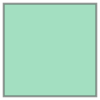

In [76]:
box(1,2,3,4)

In [59]:
path_to_tiff = 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\NIGHTLIGHTS\\VNL_v2_npp_2018_global_vcmslcfg_c202101211500.cvg.tif'

df_reduit_cleaned_updated = calculate_nightlights_100m(df_reduit_cleaned, path_to_tiff)

C:\Users\d\AppData\Local\Temp\ipykernel_49204\4231850503.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nightlights2'] = nightlights2


In [60]:
df_reduit_cleaned_updated

,country,year,hhid,grappe,menage,vague,zae,region,milieu,milieu2,...,GPS__Latitude,GPS__Longitude,GPS__Accuracy,GPS__Altitude,GPS__Timestamp,nom_prenom_cm,localisation_menage,nightlights,nightlights_bins,nightlights2
0,CIV,2018,101.0,1,1,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,5.340541,-4.026030,46.0,39.0,2018-10-29T17:56:23,,,NaN,NaN,175.0
1,CIV,2018,102.0,1,2,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,5.340402,-4.025834,47.0,28.0,2018-10-29T17:54:35,,,NaN,NaN,175.0
2,CIV,2018,103.0,1,3,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,5.340151,-4.025953,35.0,68.0,2018-10-29T17:51:50,,,NaN,NaN,175.0
3,CIV,2018,104.0,1,4,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,5.340500,-4.026202,32.0,59.0,2018-10-29T19:48:39,,,NaN,NaN,175.0
4,CIV,2018,105.0,1,5,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,5.339820,-4.025066,49.0,72.0,2018-10-29T18:45:09,,,NaN,NaN,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,CIV,2019,108408.0,1084,8,2,CENTRE,MORONOU,Rural,Rural,...,6.546733,-4.508211,7.0,134.0,2019-06-16T19:42:05,,,NaN,NaN,185.0
12988,CIV,2019,108409.0,1084,9,2,CENTRE,MORONOU,Rural,Rural,...,6.549112,-4.505840,36.0,131.0,2019-06-17T08:10:57,,,NaN,NaN,185.0
12989,CIV,2019,108410.0,1084,10,2,CENTRE,MORONOU,Rural,Rural,...,6.551556,-4.507530,29.0,118.0,2019-06-16T09:30:14,,,NaN,NaN,185.0
12990,CIV,2019,108411.0,1084,11,2,CENTRE,MORONOU,Rural,Rural,...,6.552345,-4.507551,19.0,157.0,2019-06-16T10:18:13,,,NaN,NaN,185.0


In [61]:
# Compter le nombre de valeurs NaN dans 'nightlights'
nan_count = df_reduit_cleaned_updated['nightlights2'].isna().sum()

print(f"Nombre de valeurs NaN dans 'nightlights2': {nan_count}")


Nombre de valeurs NaN dans 'nightlights2': 0


In [62]:
import matplotlib.pyplot as plt

# Créer un histogramme de la colonne 'nightlights'
plt.hist(df_reduit_cleaned_updated['nightlights2'].dropna(), bins=20, edgecolor='black')
plt.title('Histogramme des Lumières Nocturnes 2')
plt.xlabel('Intensité Lumineuse Nocturne 2')
plt.ylabel('Fréquence')
plt.show()
plt.savefig('C:/Users/d/Desktop/Programme du projet sur CNN pauvreté/histogramme_lumieres_nocturnes2.png')


C:\Users\d\AppData\Local\Temp\ipykernel_49204\814164417.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [54]:
# Compter les occurrences de chaque valeur unique dans 'nightlights'
frequency_table = df_reduit_cleaned_updated['nightlights2'].value_counts()

# Trier le tableau de fréquence par index (qui sont les valeurs de luminosité nocturne)
frequency_table_sorted = frequency_table.sort_index()

print(frequency_table_sorted)
import pandas as pd

# Définir les intervalles. Vous pouvez ajuster ces intervalles selon la distribution de vos données
bins = [0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# Utiliser pd.cut pour regrouper les valeurs en intervalles
df_reduit_cleaned_updated['nightlights_bins'] = pd.cut(df_reduit_cleaned_updated['nightlights2'], bins)

# Compter les occurrences dans chaque intervalle
frequency_table_intervals = df_reduit_cleaned_updated['nightlights_bins'].value_counts().sort_index()

print(frequency_table_intervals)

nightlights2
171.00       6
171.50       5
172.00      32
173.00      99
173.50      17
174.00     202
174.25       9
174.50      42
174.75       1
175.00     568
175.25       1
175.50      39
176.00     165
176.25       3
176.50      32
176.75       1
177.00     280
177.25       3
177.50      59
178.00     248
178.25       1
178.50      49
178.75       5
179.00     104
179.25       1
179.50      12
179.75       3
180.00     104
180.25       7
180.50      82
180.75       1
181.00     282
181.25       3
181.50      47
181.75      19
182.00     225
182.25       2
182.50      23
182.75       1
183.00     754
183.25       4
183.50      33
184.00    1459
184.25      10
184.50      47
184.75       8
185.00    2711
185.25       5
185.50      34
185.75       5
186.00    3720
186.25       1
186.50      23
187.00    1314
187.50      15
187.75       8
188.00      43
189.00       2
190.00       1
Name: count, dtype: int64
nightlights_bins
(0, 1]      0
(1, 2]      0
(2, 3]      0
(3, 4]      0
(4,

C:\Users\d\AppData\Local\Temp\ipykernel_49204\1011388307.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduit_cleaned_updated['nightlights_bins'] = pd.cut(df_reduit_cleaned_updated['nightlights2'], bins)


In [63]:
df_reduit_cleaned_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12980 entries, 0 to 12991
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   country              12980 non-null  object  
 1   year                 12980 non-null  int16   
 2   hhid                 12980 non-null  float32 
 3   grappe               12980 non-null  int16   
 4   menage               12980 non-null  int8    
 5   vague                12980 non-null  int8    
 6   zae                  12980 non-null  category
 7   region               12980 non-null  category
 8   milieu               12980 non-null  category
 9   milieu2              12980 non-null  category
 10  hhweight             12980 non-null  float32 
 11  hhsize               12980 non-null  int8    
 12  eqadu1               12980 non-null  float64 
 13  eqadu2               12980 non-null  float32 
 14  hgender              12980 non-null  category
 15  hage                 129

In [66]:
df_reduit_cleaned_updated['nightlights2'].max()

190.0

In [67]:
df_reduit_cleaned_updated['nightlights2'].min()

171.0

In [68]:
# Calcul de la corrélation entre 'pcexp' et 'nightlights2'
correlation_pcexp_nightlights2 = df_reduit_cleaned_updated['pcexp'].corr(df_reduit_cleaned_updated['nightlights2'])

# Calcul de la corrélation entre 'pcexp' et 'nightlights'
correlation_pcexp_nightlights = df_reduit_cleaned_updated['pcexp'].corr(df_reduit_cleaned_updated['nightlights'])

print(f"Corrélation entre 'pcexp' et 'nightlights2': {correlation_pcexp_nightlights2}")
print(f"Corrélation entre 'pcexp' et 'nightlights': {correlation_pcexp_nightlights}")

Corrélation entre 'pcexp' et 'nightlights2': -0.189842151907992
Corrélation entre 'pcexp' et 'nightlights': -0.12812706191818243


In [70]:
sum(df_reduit_cleaned_updated['nightlights2'].isna())

0

In [89]:
#df_reduit.fillna(0, inplace=True) # Replace 0 with any other value or method you'd like to use for filling
#df_reduit.dropna(subset=['GPS__Latitude', 'GPS__Longitude', 'GPS__Accuracy', 'GPS__Altitude'])
#fillna(0, inplace=True)
#df_reduit.nightlights.fillna(0,inplace=True)

values = {'nightlights': 0,}
df_reduit_cleaned.fillna(value=values, inplace=True)

C:\Users\d\AppData\Local\Temp\ipykernel_11600\751088787.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduit_cleaned.fillna(value=values, inplace=True)


ValueError: cannot convert float NaN to integer

In [90]:
df_reduit_cleaned.head

<bound method NDFrame.head of       country  year      hhid  grappe  menage  vague      zae  \
0         CIV  2018     101.0       1       1      1  ABIDJAN   
1         CIV  2018     102.0       1       2      1  ABIDJAN   
2         CIV  2018     103.0       1       3      1  ABIDJAN   
3         CIV  2018     104.0       1       4      1  ABIDJAN   
4         CIV  2018     105.0       1       5      1  ABIDJAN   
...       ...   ...       ...     ...     ...    ...      ...   
12987     CIV  2019  108408.0    1084       8      2   CENTRE   
12988     CIV  2019  108409.0    1084       9      2   CENTRE   
12989     CIV  2019  108410.0    1084      10      2   CENTRE   
12990     CIV  2019  108411.0    1084      11      2   CENTRE   
12991     CIV  2019  108412.0    1084      12      2   CENTRE   

                   region  milieu         milieu2  ...  interview__key  \
0      AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...     37-12-91-96   
1      AUTONOME D'ABIDJAN  Urbain  Abidja

In [91]:
df_reduit_cleaned.to_csv(os.path.join(BASE_DIR,"DataCIV.csv"), index=False)

In [92]:
df_reduit_cleaned

,country,year,hhid,grappe,menage,vague,zae,region,milieu,milieu2,...,interview__key,interview__id,GPS__Latitude,GPS__Longitude,GPS__Accuracy,GPS__Altitude,GPS__Timestamp,nom_prenom_cm,localisation_menage,nightlights
0,CIV,2018,101.0,1,1,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,37-12-91-96,2eb3d29ba9814aa9bf99d6908559e7d2,5.340541,-4.026030,46.0,39.0,2018-10-29T17:56:23,,,0.0
1,CIV,2018,102.0,1,2,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,66-72-76-42,99990d719d6243a38fad96a4d7477742,5.340402,-4.025834,47.0,28.0,2018-10-29T17:54:35,,,0.0
2,CIV,2018,103.0,1,3,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,00-21-02-40,6cf633ef989c4a6a93ec483de1fd8193,5.340151,-4.025953,35.0,68.0,2018-10-29T17:51:50,,,0.0
3,CIV,2018,104.0,1,4,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,69-94-30-00,67feab4e35d141679ec4b867a59cba19,5.340500,-4.026202,32.0,59.0,2018-10-29T19:48:39,,,0.0
4,CIV,2018,105.0,1,5,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,92-17-10-43,dc1f1fa87d8e433e8891a4e55a8baca0,5.339820,-4.025066,49.0,72.0,2018-10-29T18:45:09,,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,CIV,2019,108408.0,1084,8,2,CENTRE,MORONOU,Rural,Rural,...,50-03-51-41,103cff29baaf4405863e1043897aa6dc,6.546733,-4.508211,7.0,134.0,2019-06-16T19:42:05,,,0.0
12988,CIV,2019,108409.0,1084,9,2,CENTRE,MORONOU,Rural,Rural,...,82-42-90-66,e3a3deb8965e45c18018d1e5d103d914,6.549112,-4.505840,36.0,131.0,2019-06-17T08:10:57,,,0.0
12989,CIV,2019,108410.0,1084,10,2,CENTRE,MORONOU,Rural,Rural,...,21-28-94-39,45397589c6d44a478051e4089a884c97,6.551556,-4.507530,29.0,118.0,2019-06-16T09:30:14,,,0.0
12990,CIV,2019,108411.0,1084,11,2,CENTRE,MORONOU,Rural,Rural,...,24-86-66-78,505343592b0f4b8b8ede9980f714b8ab,6.552345,-4.507551,19.0,157.0,2019-06-16T10:18:13,,,0.0


In [93]:
df_reduit_cleaned['nightlights'].mean()

8.209090909090909

In [95]:
import matplotlib
matplotlib.use('TkAgg')  # Switch to a GUI backend
import matplotlib.pyplot as plt

# Your plotting code here
plt.hist(df_reduit_cleaned['nightlights'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Nightlights')
plt.xlabel('Nightlight Intensity')
plt.ylabel('Frequency')
plt.show()


In [96]:
# Assuming df_reduit_cleaned is your DataFrame and 'nightlights' is the column of interest
summary_stats = df_reduit_cleaned['nightlights'].describe()
print(summary_stats)

count    12980.000000
mean         8.209091
std         37.966074
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        188.000000
Name: nightlights, dtype: float64
